In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    #in __init__, initialize the layers you'd like to use
    self.fc1 = nn.Linear(100,50)
    self.bn = nn.BatchNorm1d(num_features=50)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.bn(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

In [ ]:
# BatchNorm 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20,100)
output1 = m(input)

# BatchNorm 2D
m = nn.BatchNorm2d(100)
input = torch.randn(20,100,35,45)
output2 = m(input)

print(output1.size(), '\n\n', output2.size())


torch.Size([20, 100]) 

 torch.Size([20, 100, 35, 45])


In [ ]:
## Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d

## 간단하게 설명하자면 '적용되는 데이터의 차원에 따라 다른 형태로 사용된다'는 것이다.
## batchnorm1d는 1차원 데이터에 사용괴며 주로 다층 perceptrone 네트워크에서 사용되고
## batchnorm2d는 2차원 데이터에 사용되며 주로 cnn 네트워크에서 사용된다.

## 2. Weight Initialization


In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.Maxpool2d(2,2),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.Maxpool2d(2,2)
    )
    self.fc_layer = nn.Sequetial(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

    for m in self.modules():

      if isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight.data)
        m.bias.data.fill_(0)


      elif isinstance(m, nn.Linear):
        init.kaiming_normal_(m.weight.data)
        m.bias.data.fill_(0)

    def forward(self,x):
      out = self.fc_layer(x)
      out = out.view(batch_size,-1)
      out = self.fc_layer(out)
      return out

In [ ]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

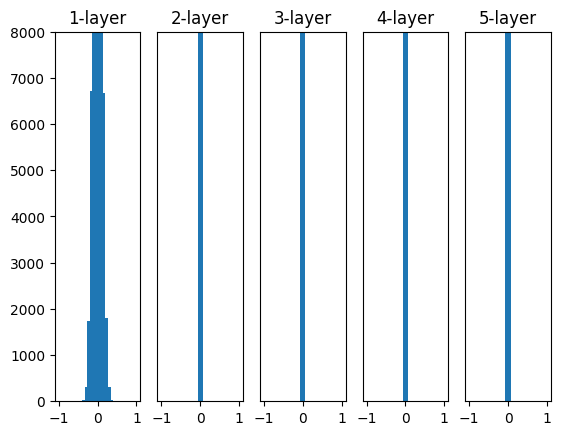

In [ ]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

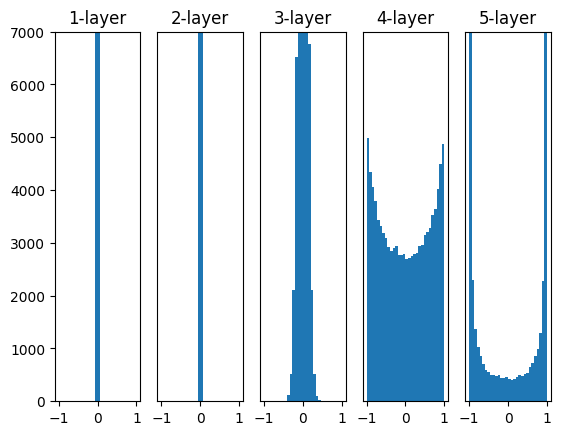

In [ ]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

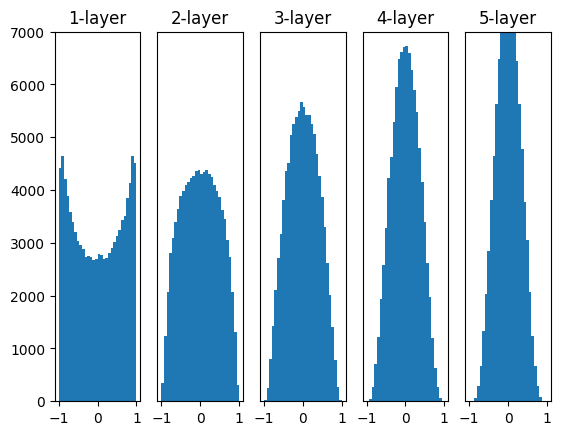

In [ ]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

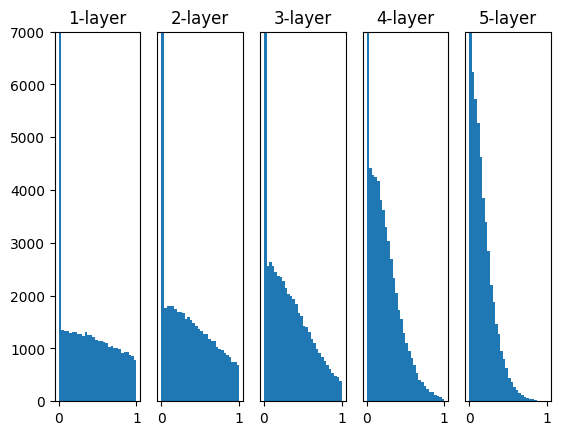

In [ ]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

.

## 3. CNN

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))


Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [ ]:
# Now let's construct a CNN model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [ ]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 138539524.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 24358675.61it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 27011613.29it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3816211.69it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [ ]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.3138890266418457
loss of 0 epoch, 100 index : 0.9802111983299255
loss of 0 epoch, 200 index : 0.48572883009910583
loss of 0 epoch, 300 index : 0.3695831596851349
loss of 0 epoch, 400 index : 0.42342570424079895
loss of 0 epoch, 500 index : 0.17116013169288635
loss of 0 epoch, 600 index : 0.28094980120658875
loss of 0 epoch, 700 index : 0.15067358314990997
loss of 0 epoch, 800 index : 0.1285526156425476
loss of 0 epoch, 900 index : 0.3268606662750244
loss of 0 epoch, 1000 index : 0.1335621178150177
loss of 0 epoch, 1100 index : 0.2466084510087967
loss of 1 epoch, 0 index : 0.1235061064362526
loss of 1 epoch, 100 index : 0.068961963057518
loss of 1 epoch, 200 index : 0.1261955350637436
loss of 1 epoch, 300 index : 0.03068459779024124
loss of 1 epoch, 400 index : 0.054882071912288666
loss of 1 epoch, 500 index : 0.11770810186862946
loss of 1 epoch, 600 index : 0.10425851494073868
loss of 1 epoch, 700 index : 0.0831434354186058
loss of 1 epoch, 800 index : 0.34

In [ ]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

cnn.eval()  ## 모델을 평가 모드로 전환
test_loss = 0
correct = 0  ## 저장할 변수를 전부 0으로 설정
with torch.no_grad():  ## 자동미분안되게
  for data, target in test_loader:  ## 순차적으로 data와 target을 가져온다
    output = cnn(data)  ## 여기서 예측 결과 output을 얻는다
    test_loss += criterion(output, target).item()  ## 얻은 손실을 계속해서 샇아서 test_loss로 지정
    pred = output.argmax(dim=1, keepdim=True)  ## output에서 가장 큰 값 index를 찾는다 -> 예측 레이블
    correct += pred.eq(target.view_as(pred)).sum().item()  ## 예측 레이블 갯수를 계속 축적해서 correct에 더한다
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))  ## 정확도


Test set: Average loss: 6.7013, Accuracy: 9891/10000 (99%)



In [ ]:
# Question (optional)
# Try to adjust the hyperparameters (kernel size, # of conv layers, ...)
# and get better results than the baseline (default) model!!

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(in_channels=50, out_channels=80, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 100, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x))


        x = x.view(-1, 80 * 2 * 2) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [ ]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (50x320 and 1600x500)

######### 오류는 다시 확인해보겠습니다...

In [ ]:

cnn.eval()  ## 모델을 평가 모드로 전환
test_loss = 0
correct = 0  ## 저장할 변수를 전부 0으로 설정
with torch.no_grad():  ## 자동미분안되게
  for data, target in test_loader:  ## 순차적으로 data와 target을 가져온다
    output = cnn(data)  ## 여기서 예측 결과 output을 얻는다
    test_loss += criterion(output, target).item()  ## 얻은 손실을 계속해서 샇아서 test_loss로 지정
    pred = output.argmax(dim=1, keepdim=True)  ## output에서 가장 큰 값 index를 찾는다 -> 예측 레이블
    correct += pred.eq(target.view_as(pred)).sum().item()  ## 예측 레이블 갯수를 계속 축적해서 correct에 더한다
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))  ## 정확도